# PPIRef dataset

<p align="center">
  <img align="right" width="350" src="https://github.com/anton-bushuiev/PPIRef/assets/67932762/f5d12ffb-8d1b-40b8-bab1-23d33a091f05"/>
</p>

PPIRef is a complete* and non-redundant dataset of protein-protein interactions (PPIs) mined from the Protein Data Bank (PDB). Inspired by , inspired by the [UniRef](https://www.uniprot.org/help/uniref) dataset of protein sequences, PPIRef aims to provide standard data for machine learning problems on the structures of protein-protein interactions.

The PPIRef dataset was constructed in three steps (see [our paper](https://arxiv.org/abs/2310.18515) for details): 

1. Exhaustevily extract all putative protein dimers from PDB based on heavy atom contacts (we use two variants with 6A and 10A distance cutoffs). By "putative" dimers we mean protein pairs from the same PDB entry that have at least one pair of heavy atoms within the specified distance cutoff.
2. Filter out not proper PPIs, those having small buried surface area (BSA) of the interaction or low quality of the structure.
3. Remove near-duplicate PPIs with iDist - a fast algorithm accurately approximating 3D alignment-based algorithms, such as iAlign, for measuring PPI similarity.

\* (with respect to PDB in Jan, 2024)

## Downloading

The PPIRef dataset is available on [Zenodo](https://zenodo.org/records/10700674). We recommended downloading it and putting under `PPIRef/ppiref/data/ppiref`. This can be done automatically by running the following command to download all 6A interfaces in .pdb files (see the "Installation" section on how to install the ppiref package):

In [1]:
from ppiref.utils.misc import download_from_zenodo
download_from_zenodo('ppi_6A.zip')

Downloading: 100%|██████████| 6.94G/6.94G [10:19<00:00, 11.2MiB/s]
Extracting: 100%|██████████| 831382/831382 [02:36<00:00, 5313.49files/s]


## Reconstructing from scratch

Alternatively, the dataset may be reconstructed from scratch with the following steps: (i) downloading and unpacking PDB (`scripts/download_pdb.sh` and `scripts/unpack_pdb.sh`), (ii) extracting all putative distance-based dimeric PPIs from all .pdb files (`scripts/ppi_extractor.py`) and (iii) filtering and clustering PPIs using iDist (see the "Clustering PPIs" section). The `ppi_6A.zip` archive contains the result of steps (i) and (ii), and the filtered subsets resulting from step (iii) are stored in `ppiref/data/splits`, as discussed below.

## Using subsets and splits

After downloading or reconstructing the PPIRef dataset, you will obtain all the dimeric interactions in PDB that have at least one contact between heavy atoms within the threshold distance (6 Angstrom for `ppi_6A.zip`). Then, you can use the predefined splits and other subsets, located in `ppiref/data/splits`. They can be read with the `ppiref.split.read_split` function (see the "Splitting and subsetting PPIs" section for details). The splits are stored in JSON files and contain the PPI IDs (e.g., `1bui_A_C` for the interaction between chains `A` and `C` in the `1bui` PDB entry) for each subset (e.g., `train`, `test`, `val`). Some examples are:

- `ppiref_6A_filtered.json` - all 6A interfaces that satisfy the filtering criteria for proper PPIs (a.k.a PPIRef300K, see Appendix A in the [paper](https://arxiv.org/abs/2310.18515) for details).
- `ppiref_6A_filtered_clustered_04.json` - a non-redundant subset of PPIs that are deduplicated at 0.04 threshold of iDist (a.k.a PPIRef50K).

The latter subset may be the best choice for training machine learning models since it removes biases towards interactions that are overrepresneted in PDB. You can read the subset via the following code (see the "Splitting and subsetting PPIs" section for more examples):

In [5]:
from ppiref.split import read_fold
from ppiref.utils.ppi import PPI
ppi_paths = read_fold('ppiref_6A_filtered_clustered_04', 'whole')
print('Dataset size:', len(ppi_paths))

Dataset size: 51755


Sample from the dataset:

Path: /Users/anton/dev/PPIRef/ppiref/data/ppiref/ppi_6A/hc/3hch_A_B.pdb
Statistics: {'KIND': 'heavy', 'EXTRACTION RADIUS': 6.0, 'EXPANSION RADIUS': 0.0, 'RESOLUTION': 2.1, 'STRUCTURE METHOD': 'x-ray diffraction', 'DEPOSITION DATE': '2009-05-06', 'RELEASE DATE': '2009-10-13', 'BSA': 682.5337386399999}


2024-06-22 13:36:12.149 Python[98442:4970252] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


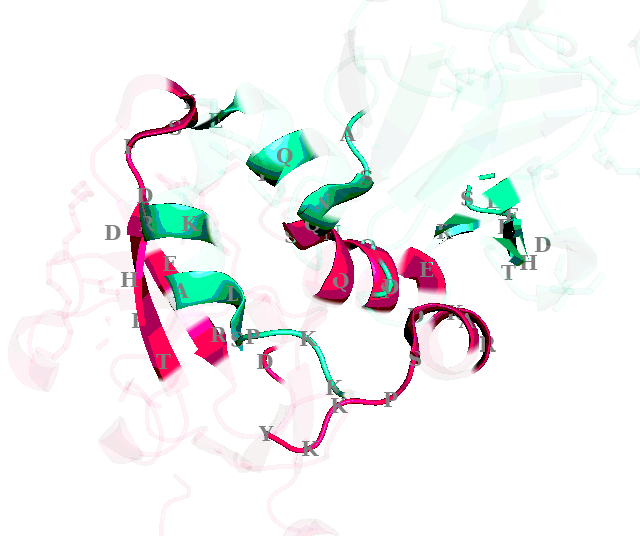

In [6]:
ppi = PPI(ppi_paths[0])
print('Path:', ppi.path)
print('Statistics:', ppi.stats)
ppi.visualize()

The PPIRef package provides methods to analyze, compare and deduplicate PPIs, as well as to search for similar PPIs in the Protein Data Bank. Please see other sections of the documentation for details.